In [ ]:
!git clone https://github.com/otavioon/d2geo.git

In [1]:
import segyio
import matplotlib.pyplot as plt
import numpy as np
import os
import time

np.bool = np.bool_
# np.set_printoptions(threshold = np.inf) # Supaya tidak ada truncation
%matplotlib auto

mulai = time.time()

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
segy_input = '../dataset/TrainingData_Image.segy'
seismic_data = segyio.tools.cube(segy_input)

In [3]:
print('Original Seismic Data/Amplitude (Inline, Xline, Zline):', seismic_data.shape) # Inline, Xline, Zline

Original Seismic Data/Amplitude (Inline, Xline, Zline): (590, 782, 1006)


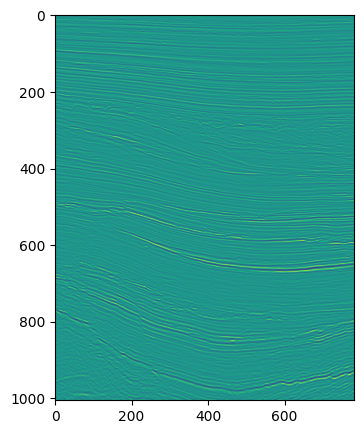

In [4]:
plt.figure(figsize=(10,5))
plt.imshow(seismic_data[180].T)
plt.show()

#### Amplitude

In [3]:
amp_output_dir = 'output/All/Amplitude'

if not os.path.exists(amp_output_dir):
    os.mkdir(amp_output_dir)

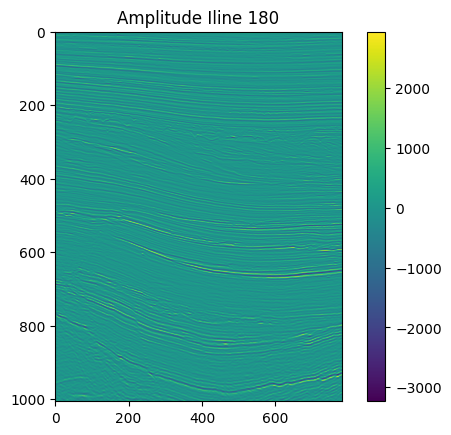

In [6]:
fig = plt.figure()
sim = plt.imshow(seismic_data[180].T)
plt.title('Amplitude Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(amp_output_dir, 'amplitude-iline-180.png'))

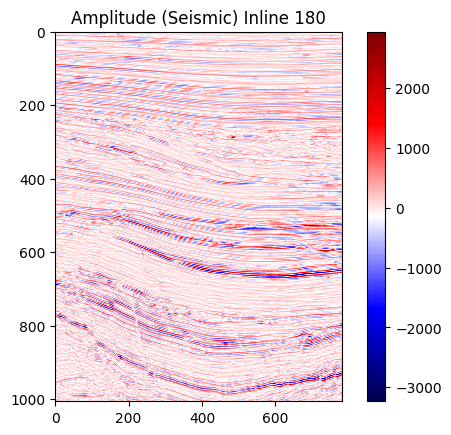

In [12]:
fig = plt.figure()
sim = plt.imshow(seismic_data[180].T, cmap='seismic')
plt.title('Amplitude (Seismic) Inline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(amp_output_dir, 'amplitude-seismic-iline-180.png'))

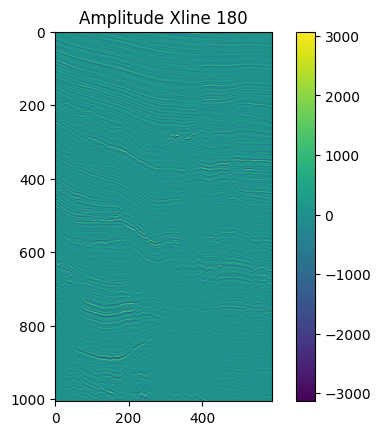

In [7]:
fig = plt.figure()
sim = plt.imshow(seismic_data[:, 180, :].T)
plt.title('Amplitude Xline 180')
plt.colorbar(sim)
fig.savefig(os.path.join(amp_output_dir, 'amplitude-xline-180.png'))

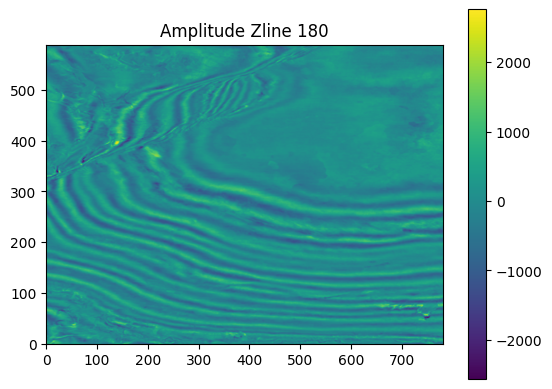

In [4]:
fig = plt.figure()
sim = plt.imshow(seismic_data[:, :, 180], origin='lower')
plt.title('Amplitude Zline 180')
plt.colorbar(sim)
fig.savefig(os.path.join(amp_output_dir, 'amplitude-zline-180.png'))

#### Signal Process

In [7]:
from attributes import SignalProcess

sp = SignalProcess.SignalProcess()

In [10]:
fd = sp.first_derivative(seismic_data)
print('First Derivative:', fd.shape)

sd = sp.second_derivative(seismic_data)
print('Second Derivative:', sd.shape)

rms = sp.rms(seismic_data)
print('Root Mean Square:', rms.shape)

tg = sp.time_gain(seismic_data)
print('Time Gain:', tg.shape)

gm = sp.gradient_magnitude(seismic_data)
print('Gradient Magnitude:', gm.shape)

ri = sp.reflection_intensity(seismic_data)
print('Reflection Intesity:', ri.shape)

he = sp.histogram_equalization(seismic_data)
print('Histogram Equalization:', he.shape)

pr = sp.phase_rotation(seismic_data, 60)
print('Phase Rotation:', pr.shape)

# tagc = sp.trace_agc(seismic_data)
# print('Trace AGC:', tagc.shape)

First Derivative: (592, 784, 1008)
Second Derivative: (594, 786, 1010)
Root Mean Square: (590, 782, 1014)
Time Gain: (610, 806, 1008)
Gradient Magnitude: (598, 790, 1014)
Reflection Intesity: (590, 782, 1006)
Histogram Equalization: (610, 806, 1008)
Phase Rotation: (590, 782, 1030)


In [64]:
# tagc = sp.trace_agc(seismic_data) # Bermasalah di fungsi dask.array.tensordot()
# print('Trace AGC:', tagc.shape)

AttributeError: 'Array' object has no attribute 'tensordot'

In [10]:
npy_sd = sd.compute() # Untuk ubah Dask Array ke NumPy Array
# npy_sd.astype(np.float64)
type(sd), sd.dtype, type(npy_sd), npy_sd.dtype

(dask.array.core.Array, dtype('float32'), numpy.ndarray, dtype('float32'))

In [12]:
sp_output_dir = 'output/All/Signal Process'

if not os.path.exists(sp_output_dir):
    os.mkdir(sp_output_dir)

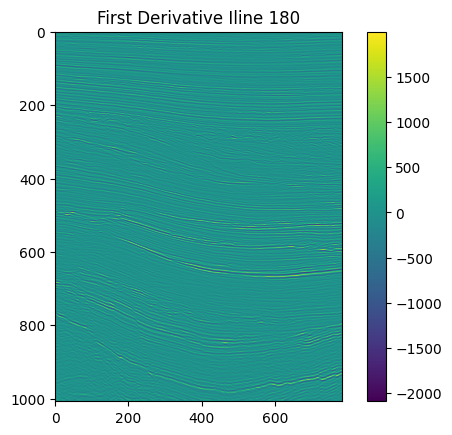

In [13]:
fig = plt.figure()
sim = plt.imshow(fd[180].T)
plt.title('First Derivative Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'first-derivative-iline-180.png'))

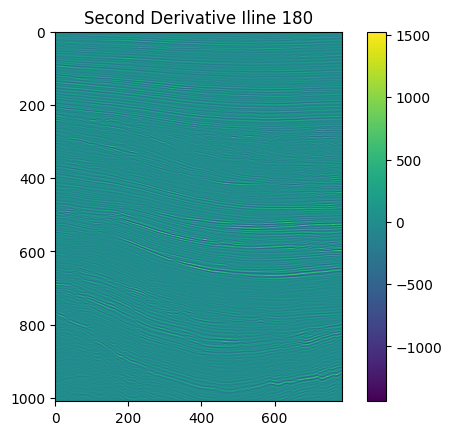

In [14]:
fig = plt.figure()
sim = plt.imshow(sd[180].T)
plt.title('Second Derivative Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'second-derivative-iline-180.png'))

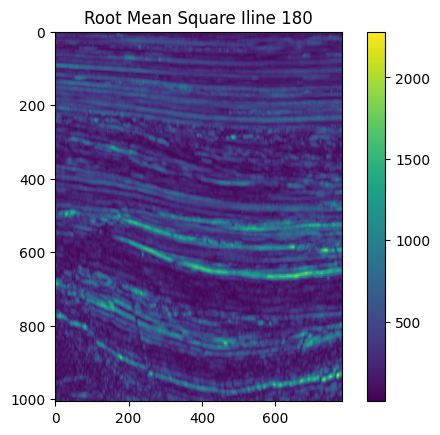

In [15]:
fig = plt.figure()
sim = plt.imshow(rms[180].T)
plt.title('Root Mean Square Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'root-mean-square-iline-180.png'))

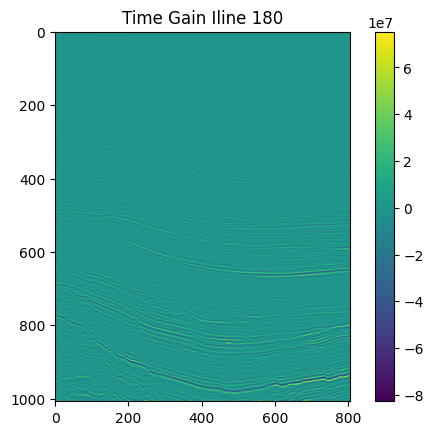

In [16]:
fig = plt.figure()
sim = plt.imshow(tg[180].T)
plt.title('Time Gain Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'time-gain-iline-180.png'))

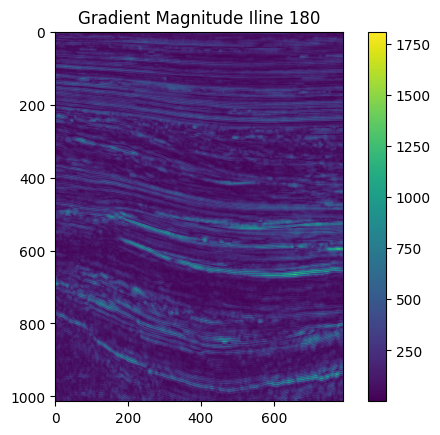

In [17]:
fig = plt.figure()
sim = plt.imshow(gm[180].T)
plt.title('Gradient Magnitude Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'gradient-magnitude-iline-180.png'))

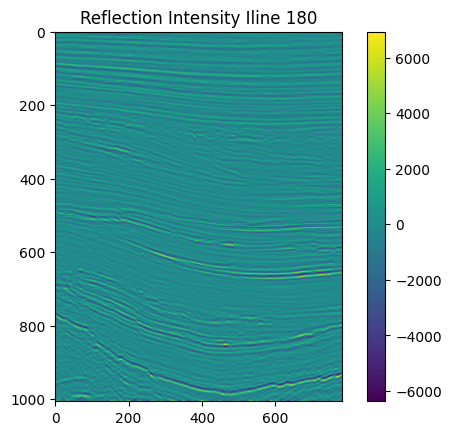

In [18]:
fig = plt.figure()
sim = plt.imshow(ri[180].T)
plt.title('Reflection Intensity Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'reflection-intensity-iline-180.png'))

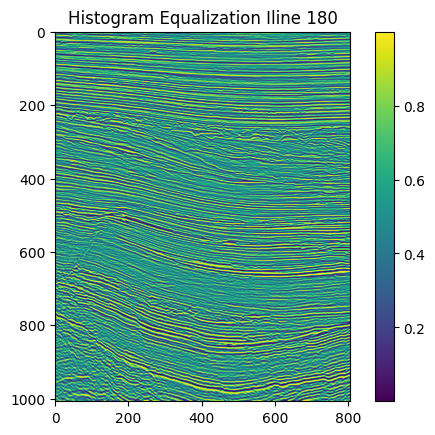

In [19]:
fig = plt.figure()
sim = plt.imshow(he[180].T)
plt.title('Histogram Equalization Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'histogram-equalization-iline-180.png'))

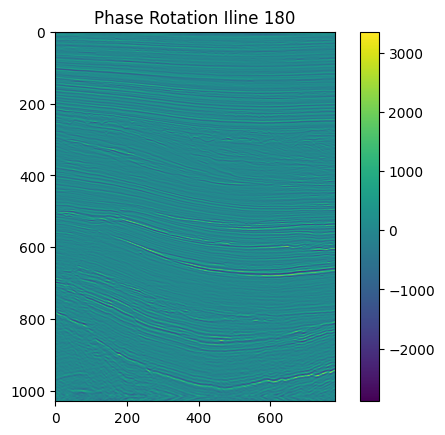

In [20]:
fig = plt.figure()
sim = plt.imshow(pr[180].T)
plt.title('Phase Rotation Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(sp_output_dir, 'phase-rotation-iline-180.png'))

#### Complex Trace

In [19]:
from attributes import CompleTrace

ct = CompleTrace.ComplexAttributes()

In [22]:
e = ct.envelope(seismic_data)
print('Envelope:', e.shape)

ifreq = ct.instantaneous_frequency(seismic_data)
print('Instantaneous Frequency:', ifreq.shape)

ip = ct.instantaneous_phase(seismic_data)
print('Instantaneous Phase:', ip.shape)

s = ct.sweetness(seismic_data)
print('Sweetness:', s.shape)

cip = ct.cosine_instantaneous_phase(seismic_data)
print('Cosine Instantaneous Phase:', cip.shape)

ib = ct.instantaneous_bandwidth(seismic_data)
print('Instantaneous Bandwith:', ib.shape)

dfreq = ct.dominant_frequency(seismic_data)
print('Dominant Frequency:', dfreq.shape)

rp = ct.response_phase(seismic_data)
print('Response Phase:', rp.shape)

rfreq = ct.response_frequency(seismic_data)
print('Response Frequency:', rfreq.shape)

freqc = ct.frequency_change(seismic_data)
print('Frequency Change:', freqc.shape)

ac = ct.amplitude_acceleration(seismic_data)
print('Amplitude Acceleration:', ac.shape)

rac = ct.relative_amplitude_change(seismic_data)
print('Relative Amplitude Change:', rac.shape)

qf = ct.quality_factor(seismic_data)
print('Quality Factor:', qf.shape)

ra = ct.response_amplitude(seismic_data)
print('Response Amplitude:', ra.shape)

ap = ct.apparent_polarity(seismic_data)
print('Apparent Polarity:', ap.shape)

Envelope: (590, 782, 1030)
Instantaneous Frequency: (592, 784, 1032)
Instantaneous Phase: (590, 782, 1030)
Sweetness: (590, 782, 1030)
Cosine Instantaneous Phase: (590, 782, 1030)
Instantaneous Bandwith: (592, 784, 1032)
Dominant Frequency: (592, 784, 1032)
Response Phase: (590, 782, 1030)
Response Frequency: (590, 782, 1030)
Frequency Change: (594, 786, 1034)
Amplitude Acceleration: (594, 786, 1034)
Relative Amplitude Change: (592, 784, 1032)
Quality Factor: (592, 784, 1032)
Response Amplitude: (590, 782, 1030)
Apparent Polarity: (590, 782, 1030)


In [23]:
ct_output_dir = 'output/All/Complex Trace'

if not os.path.exists(ct_output_dir):
    os.mkdir(ct_output_dir)

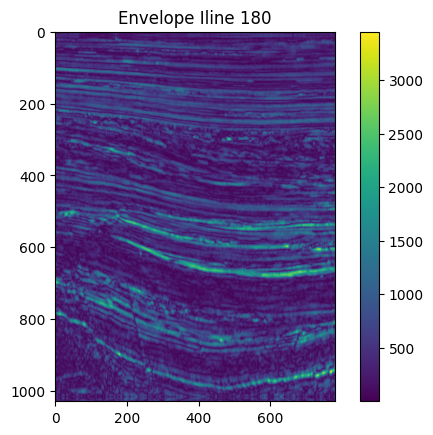

In [24]:
fig = plt.figure()
sim = plt.imshow(e[180].T)
plt.title('Envelope Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'envelope-iline-180.png'))

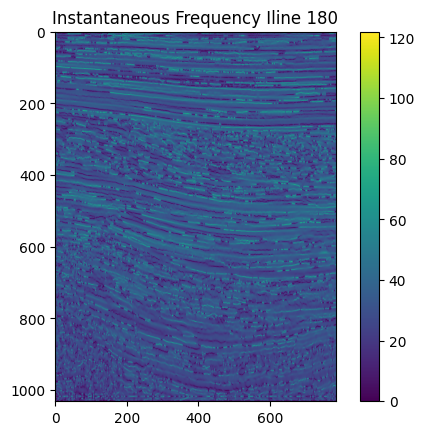

In [25]:
fig = plt.figure()
sim = plt.imshow(ifreq[180].T)
plt.title('Instantaneous Frequency Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'instantaneous-frequency-iline-180.png'))

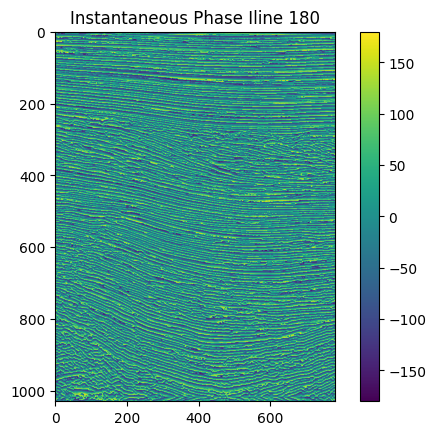

In [26]:
fig = plt.figure()
sim = plt.imshow(ip[180].T)
plt.title('Instantaneous Phase Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'instantaneous-phase-iline-180.png'))

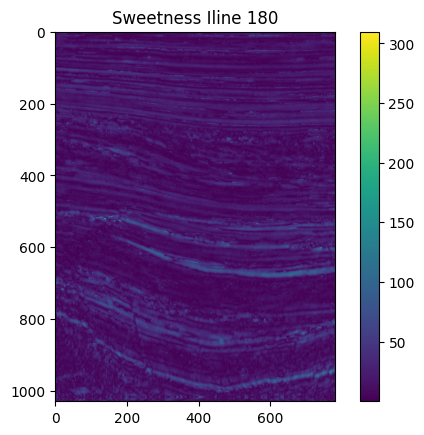

In [27]:
fig = plt.figure()
sim = plt.imshow(s[180].T)
plt.title('Sweetness Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'sweetness-iline-180.png'))

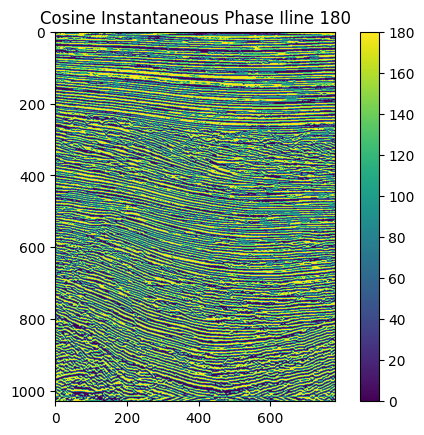

In [28]:
fig = plt.figure()
sim = plt.imshow(cip[180].T)
plt.title('Cosine Instantaneous Phase Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'cosine-instantaneous-phase-iline-180.png'))

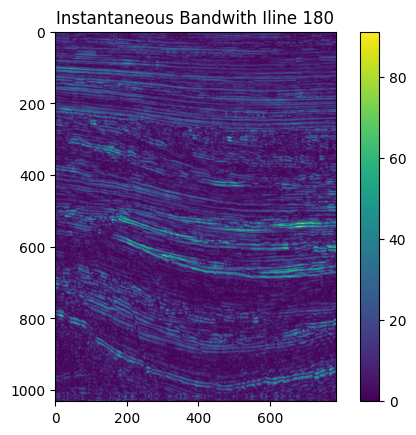

In [29]:
fig = plt.figure()
sim = plt.imshow(ib[180].T)
plt.title('Instantaneous Bandwith Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'instantaneous-bandwith-iline-180.png'))

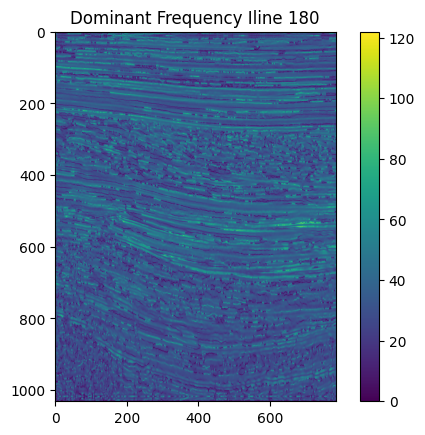

In [30]:
fig = plt.figure()
sim = plt.imshow(dfreq[180].T)
plt.title('Dominant Frequency Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'dominant-frequency-iline-180.png'))

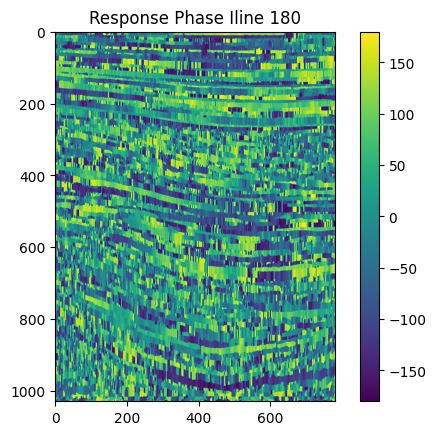

In [31]:
fig = plt.figure()
sim = plt.imshow(rp[180].T)
plt.title('Response Phase Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'response-phase-iline-180.png'))

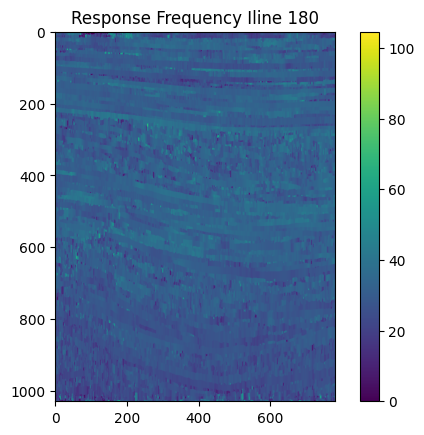

In [32]:
fig = plt.figure()
sim = plt.imshow(rfreq[180].T)
plt.title('Response Frequency Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'response-frequency-iline-180.png'))

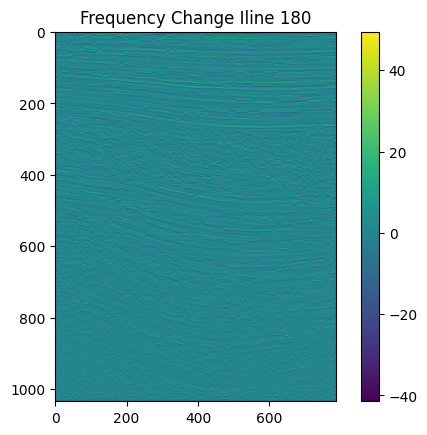

In [33]:
fig = plt.figure()
sim = plt.imshow(freqc[180].T)
plt.title('Frequency Change Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'frequency-change-iline-180.png'))

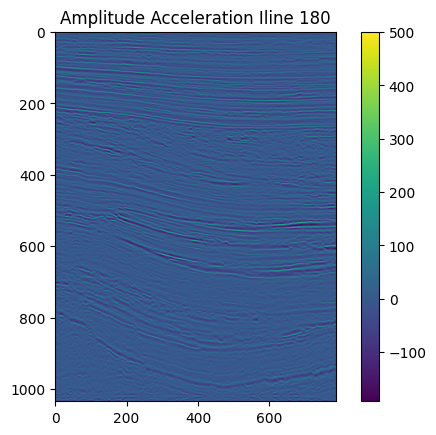

In [34]:
fig = plt.figure()
sim = plt.imshow(ac[180].T)
plt.title('Amplitude Acceleration Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'amplitude-acceleration-iline-180.png'))

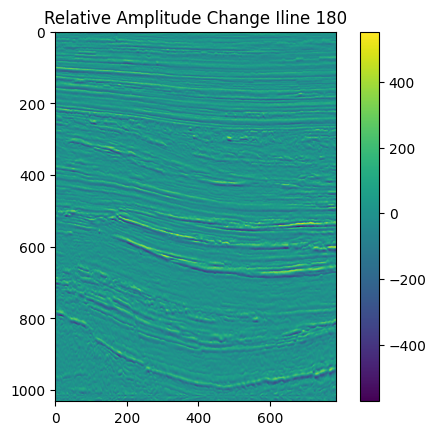

In [35]:
fig = plt.figure()
sim = plt.imshow(rac[180].T)
plt.title('Relative Amplitude Change Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'relative-amplitude-change-iline-180.png'))

d:\Saiful\Codes\env-seis\Lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


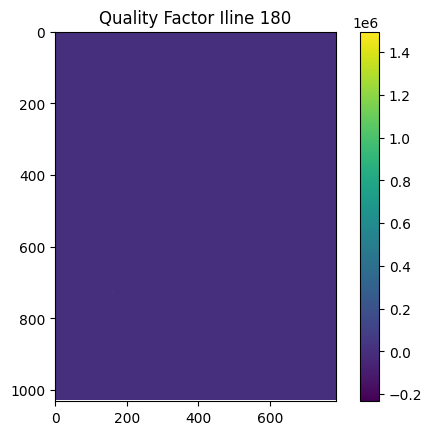

In [36]:
fig = plt.figure()
sim = plt.imshow(qf[180].T)
plt.title('Quality Factor Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ct_output_dir, 'quality-factor-iline-180.png'))

IndexError: index 1014 is out of bounds for axis 2 with size 1006

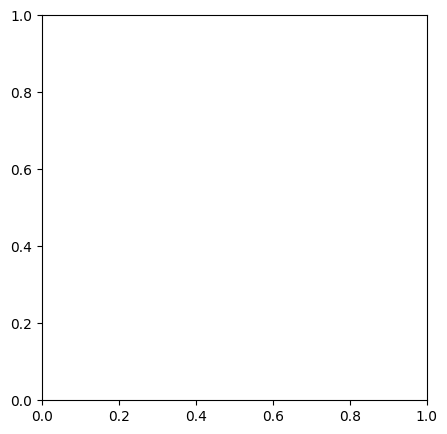

In [65]:
# plt.figure(figsize=(10,5))
# plt.imshow(ra[0].T)
# plt.show()

IndexError: index 1006 is out of bounds for axis 2 with size 1006

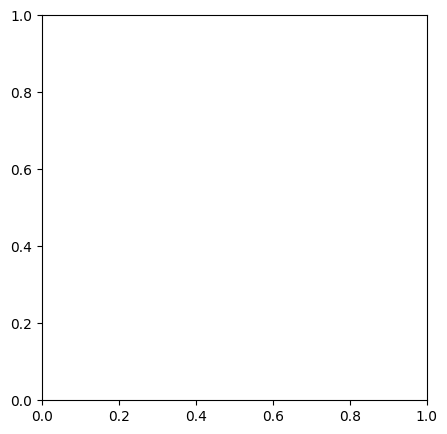

In [66]:
# plt.figure(figsize=(10,5))
# plt.imshow(ap[180].T)
# plt.show()

#### Edge Detection

In [39]:
from attributes import EdgeDetection

ed = EdgeDetection.EdgeDetection()

In [40]:
ch = ed.chaos(seismic_data)
print('Chaos:', ch.shape)

sem = ed.semblance(seismic_data)
print('Sembalance:', sem.shape)

ec = ed.eig_complex(seismic_data)
print('Eigen Complex:', ec.shape)

gst_ed = ed.gradient_structure_tensor(seismic_data)
print('Gradient Structure Tensor:', gst_ed.shape)

# vc = ed.volume_curvature(seismic_data, seismic_data)
# print('Volume Curvature:', vc.shape)

Chaos: (594, 786, 1016)
Sembalance: (590, 782, 1006)
Eigen Complex: (592, 784, 1014)
Gradient Structure Tensor: (594, 786, 1016)


In [67]:
# vc = ed.volume_curvature(seismic_data, seismic_data)
# print('Volume Curvature:', vc.shape)

ValueError: operands could not be broadcast together with shapes (592, 784, 1008) (594, 786, 1010)

In [42]:
ed_output_dir = 'output/All/Edge Detection'

if not os.path.exists(ed_output_dir):
    os.mkdir(ed_output_dir)

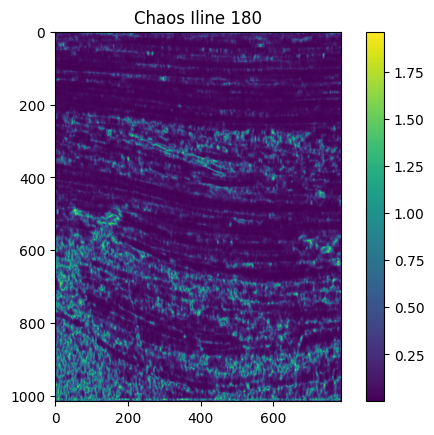

In [43]:
fig = plt.figure()
sim = plt.imshow(ch[180].T)
plt.title('Chaos Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ed_output_dir, 'chaos-iline-180.png'))

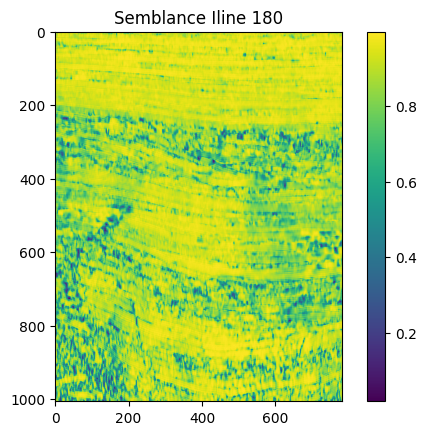

In [44]:
fig = plt.figure()
sim = plt.imshow(sem[180].T)
plt.title('Semblance Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ed_output_dir, 'semblance-iline-180.png'))

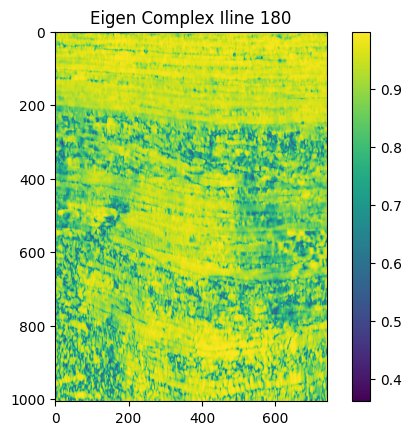

In [45]:
fig = plt.figure()
sim = plt.imshow(ec[180].T)
plt.title('Eigen Complex Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ed_output_dir, 'eigen-complex-iline-180.png'))

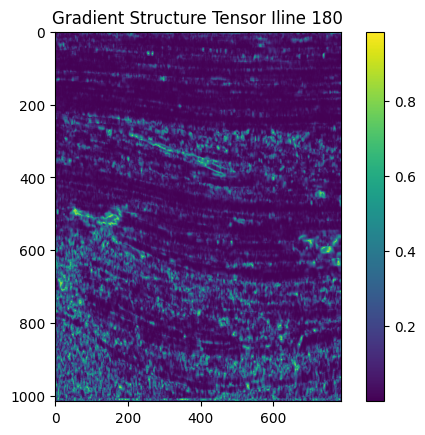

In [46]:
fig = plt.figure()
sim = plt.imshow(gst_ed[180].T)
plt.title('Gradient Structure Tensor Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(ed_output_dir, 'gradient-structure-tensor-iline-180.png'))

#### Dip Azimuth

In [47]:
from attributes import DipAzm

daz = DipAzm.DipAzm()

In [48]:
gd = daz.gradient_dips(seismic_data) # Tuple yang berisi 2 elemen yang sama: [0 sampe 1][0 sampe 592]
print('Gradient Dips:', gd[0].shape)

gst = daz.gradient_structure_tensor(seismic_data, (3,3,3)) # Tuple yang berisi 6 elemen yang sama
print('Gradient Structure Tensor:', gst[0].shape)

gst_2d_dip = daz.gst_2D_dips(seismic_data)
print('Gradient Structure Tensor 2D Dip:', gst_2d_dip[0].shape) # Tuple yang berisi 2 elemen yang sama: [0 sampe 1][0 sampe 594]

gst_3d_dip = daz.gst_3D_dip(seismic_data)
print('Gradient Structure Tensor 3D Dip:', gst_3d_dip.shape)

gst_3d_azim = daz.gst_3D_azm(seismic_data)
print('Gradient Structure Tensor 3D Azimuth:', gst_3d_azim.shape)

Gradient Dips: (592, 784, 1008)
Gradient Structure Tensor: (594, 786, 1010)
Gradient Structure Tensor 2D Dip: (594, 786, 1010)
Gradient Structure Tensor 3D Dip: (594, 786, 1010)
Gradient Structure Tensor 3D Azimuth: (594, 786, 1010)


In [49]:
daz_output_dir = 'output/All/Dip Azimuth'

if not os.path.exists(daz_output_dir):
    os.mkdir(daz_output_dir)

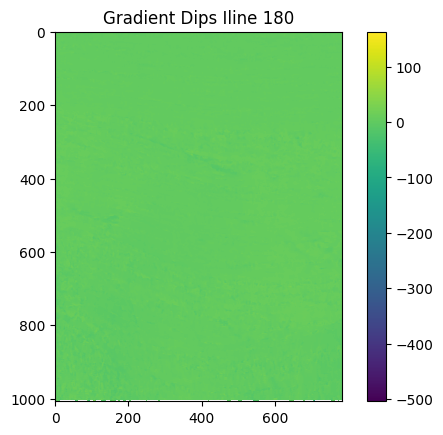

In [50]:
fig = plt.figure()
sim = plt.imshow(gd[0][180].T)
# sim = plt.imshow(gd[1][180].T)
plt.title('Gradient Dips Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(daz_output_dir, 'gradient-dips-iline-180.png'))

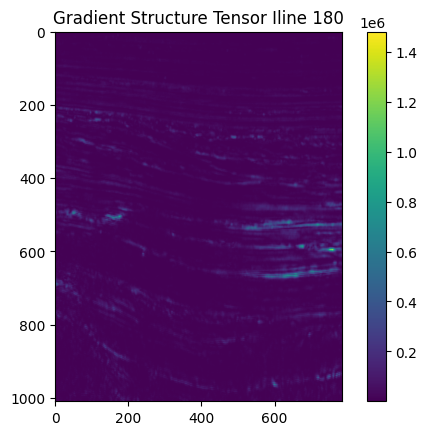

In [51]:
fig = plt.figure()
sim = plt.imshow(gst[0][180].T)
plt.title('Gradient Structure Tensor Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(daz_output_dir, 'gradient-structure-tensor-iline-180.png'))

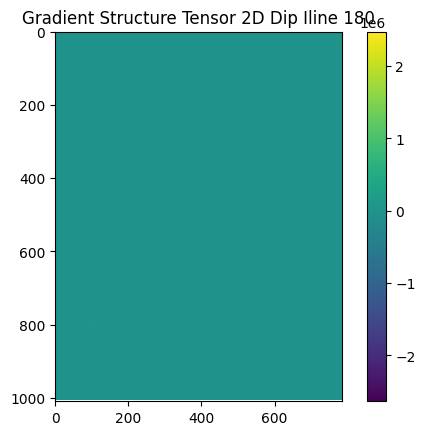

In [52]:
fig = plt.figure()
sim = plt.imshow(gst_2d_dip[0][180].T)
# sim = plt.imshow(gst_2d_dip[1][180].T)
plt.title('Gradient Structure Tensor 2D Dip Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(daz_output_dir, 'gradient-structure-tensor-2d-dip-iline-180.png'))

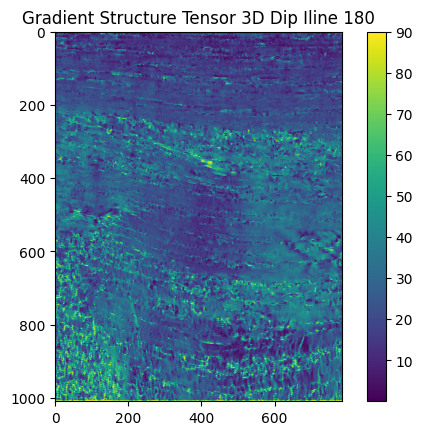

In [53]:
fig = plt.figure()
sim = plt.imshow(gst_3d_dip[180].T)
plt.title('Gradient Structure Tensor 3D Dip Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(daz_output_dir, 'gradient-structure-tensor-3d-dip-iline-180.png'))

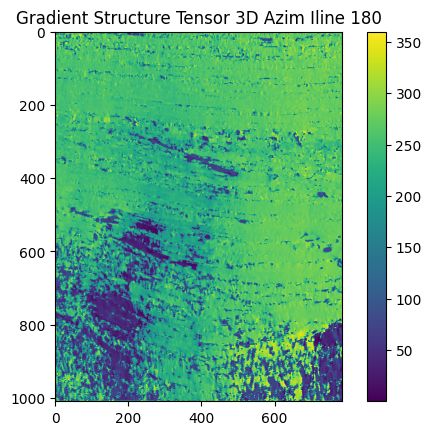

In [54]:
fig = plt.figure()
sim = plt.imshow(gst_3d_azim[180].T)
plt.title('Gradient Structure Tensor 3D Azim Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(daz_output_dir, 'gradient-structure-tensor-3d-azim-iline-180.png'))

#### Frequency

In [55]:
from attributes import Frequency

freq = Frequency.Frequency()

In [56]:
lpf = freq.lowpass_filter(seismic_data, 100)
print('Lowpass Filter:', lpf.shape)

hpf = freq.highpass_filter(seismic_data, 25)
print('Highpass Filter:', hpf.shape)

bpf = freq.bandpass_filter(seismic_data, 10, 100)
print('Bandpass Filter:', bpf.shape)

cwt_r = freq.cwt_ricker(seismic_data, 100)
print('CWT Ricker:', cwt_r.shape)

cwt_o = freq.cwt_ormsby(seismic_data, (40, 60, 80, 100))
print('CWT Ormsby:', cwt_o.shape)

Lowpass Filter: (590, 782, 1006)
Highpass Filter: (590, 782, 1006)
Bandpass Filter: (590, 782, 1006)
CWT Ricker: (590, 782, 1006)
CWT Ormsby: (590, 782, 1006)


In [57]:
freq_output_dir = 'output/All/Frequency'

if not os.path.exists(freq_output_dir):
    os.mkdir(freq_output_dir)

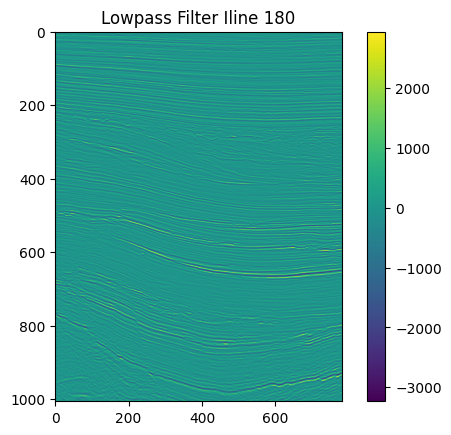

In [58]:
fig = plt.figure()
sim = plt.imshow(lpf[180].T)
plt.title('Lowpass Filter Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(freq_output_dir, 'lowpass-filter-iline-180.png'))

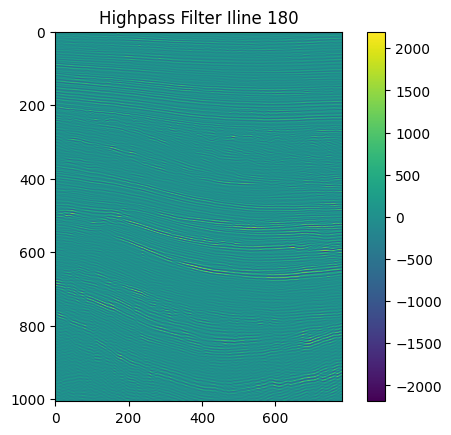

In [59]:
fig = plt.figure()
sim = plt.imshow(hpf[180].T)
plt.title('Highpass Filter Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(freq_output_dir, 'highpass-filter-iline-180.png'))

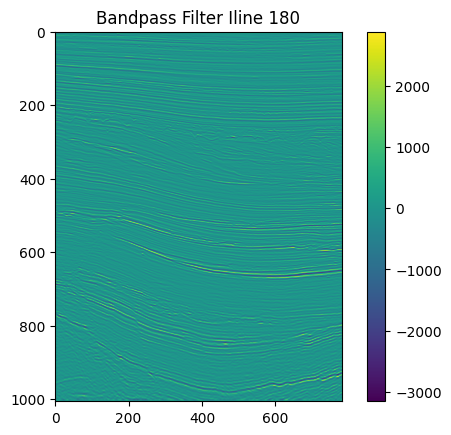

In [60]:
fig = plt.figure()
sim = plt.imshow(bpf[180].T)
plt.title('Bandpass Filter Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(freq_output_dir, 'bandpass-filter-iline-180.png'))

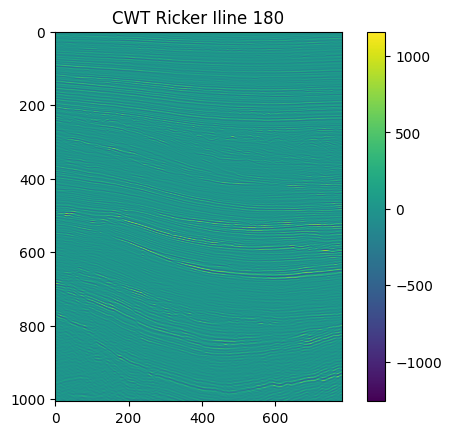

In [61]:
fig = plt.figure()
sim = plt.imshow(cwt_r[180].T)
plt.title('CWT Ricker Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(freq_output_dir, 'cwt-ricker-iline-180.png'))

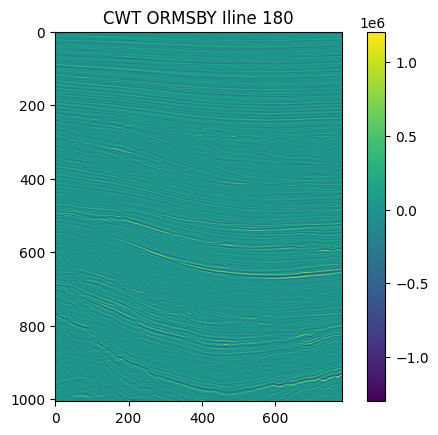

In [62]:
fig = plt.figure()
sim = plt.imshow(cwt_o[180].T)
plt.title('CWT ORMSBY Iline 180')
fig.colorbar(sim)
fig.savefig(os.path.join(freq_output_dir, 'cwt-ormsby-iline-180.png'))

In [71]:
selesai = time.time()

print(f"Durasi: {selesai-mulai} detik")
print(f"Durasi: {int((selesai-mulai)/60)} menit")

Durasi: 2972.9747824668884 detik
Durasi: 49 menit
